<a href="https://colab.research.google.com/github/lavanyamurudkar28/Datascience/blob/main/loan_prediction6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd              #pd is an Alias

#Dealing with Missing Values
#Dealing with outliers
#Converting into categorical or numerical
#Dealing with Imbalance
#Feature selection
#Dimentionality Reduction

df=pd.read_csv("train.csv")

#Preparing X and Y

X = df.drop('Loan_ID', axis=1) # Changed 'Loan_Id' to 'Loan_ID'
X = X.drop('Loan_Status', axis=1)
Y = df['Loan_Status']
#print(X)
#print(Y)

# Feature Selection 1
'''
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featuresScores = pd.concat([dfcolumns, dfscores], axis=1)
featuresScores.columns = ['Specs', 'Score']

print(featuresScores)
'''
'''
#Feature Selection 2

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_)

feat_importance = pd.Series(model.feature_importances_, index=X.columns)
feat_importance.nlargest(4).plot(kind='barh')
plt.show()
'''

#Numerical to Categorical

from sklearn.preprocessing import LabelEncoder


'''
df['SepalLengthCm']=pd.cut(df['SepalLengthCm'],3,labels=['0','1','2'])
df['SepalWidthCm']=pd.cut(df['SepalWidthCm'],3,labels=['0','1','2'])
df['PetalLengthCm']=pd.cut(df['PetalLengthCm'],3,labels=['0','1','2'])
df['PetalWidthCm']=pd.cut(df['PetalWidthCm'],3,labels=['0','1','2'])

print(df)
'''


'''
X = df.drop('Id', axis=1)
X = X.drop('Species', axis=1)
Y = df['Species']
print(Y)
le=LabelEncoder()
le.fit(Y)
Y = le.transform(Y)
print(Y)

'''


#Categorical to Numerical
'''
le=LabelEncoder()
le.fit(Y)
Y = le.transform(Y)

'''

#Dealing with missing values

'''
1. Use Drop (df.drop())
2. use Replace (df.replace("back","DOS"))
3. Fill NA ()

print(df.isnull().sum())
df['Item_Weight'].fillna((df['Item_Weight'].mean()/.median()/.mode()), inplace=True) #Imputing Neurimical Values

df['Outlet_Size'].fillna(('Medium'), inplace=True)  #Imputing Categorical Values
'''


#Oversampling and Under Sampling

'''
#a = (df['Species'] == 'Iris-setosa').sum()
#print(a)
from collections import Counter
print(Counter(Y))
from imblearn.over_sampling import RandomOverSampler     #Random OverSampling
ros=RandomOverSampler(random_state=0)
X, Y = ros.fit_resample(X,Y)
print(Counter(Y))
'''

'''
from imblearn.over_sampling import SMOTE                 #Synthetic Minority Oversampling (SMOTE) oversampling
sms=SMOTE(random_state=0)
X, Y=sms.fit_resample(X,Y)

from imblearn.under_sampling import RandomUnderSampler   #Random UnderSampling
rus=RandomUnderSampler(random_state=0)
X, Y=rus.fit_resample(X,Y)

'''

'''
#Identifying Outliers by ploting

from matplotlib import pyplot as plt
import seaborn as sns
sns.boxplot(df['SepalLengthCm'])
plt.show()
'''


#Dealing with Outliers using Interquantile Range
'''
print(df['SepalLengthCm'])
Q1 = df['SepalLengthCm'].quantile(0.25)
Q3 = df['SepalLengthCm'].quantile(0.75)

IQR = Q3 - Q1
print(IQR)

upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

print(upper)
print(lower)

out1=df[df['SepalLengthCm'] < lower].values
out2=df[df['SepalLengthCm'] > upper].values

df['SepalLengthCm'].replace(out1,lower,inplace=True)
df['SepalLengthCm'].replace(out2,upper,inplace=True)

print(df['SepalLengthCm'])
'''

'''
#Principal Component Analysis

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

logr=LogisticRegression()
pca=PCA(n_components=2)

X = df.drop('Id', axis=1)
X = X.drop('Species', axis=1)
Y = df['Species']

pca.fit(X)
X=pca.transform(X)

print(X)

X_train, X_test, y_train, y_test = train_test_split(X,Y,random_state=0,test_size=0.3)

logr.fit(X_train,y_train)

y_pred=logr.predict(X_test)
print(accuracy_score(y_test,y_pred))
'''

"\n#Principal Component Analysis\n\nfrom sklearn.decomposition import PCA\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.metrics import accuracy_score\n\nlogr=LogisticRegression()\npca=PCA(n_components=2)\n\nX = df.drop('Id', axis=1)\nX = X.drop('Species', axis=1)\nY = df['Species']\n\npca.fit(X)\nX=pca.transform(X)\n\nprint(X)\n\nX_train, X_test, y_train, y_test = train_test_split(X,Y,random_state=0,test_size=0.3)\n\nlogr.fit(X_train,y_train)\n\ny_pred=logr.predict(X_test)\nprint(accuracy_score(y_test,y_pred))\n"

In [2]:
# Feature Selection 1

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
import pandas as pd # Import pandas for DataFrame manipulation

# Initialize LabelEncoder
le = LabelEncoder()

# Iterate over columns and encode categorical features
for col in X.columns:
    if X[col].dtype == 'object':  # Check if the column is of object (string) type
        X[col] = le.fit_transform(X[col])  # Encode categorical values to numerical

# Fill missing values (NaN) with a suitable strategy, e.g., mean for numerical columns
X = X.fillna(X.mean()) # Fill NaN with the mean of each column

bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featuresScores = pd.concat([dfcolumns, dfscores], axis=1)
featuresScores.columns = ['Specs', 'Score']

print(featuresScores)

                Specs         Score
0              Gender      0.009816
1             Married      2.047144
2          Dependents      0.048953
3           Education      3.540502
4       Self_Employed      0.087261
5     ApplicantIncome     93.904964
6   CoapplicantIncome  11342.041603
7          LoanAmount     39.211545
8    Loan_Amount_Term      3.267315
9      Credit_History     25.998867
10      Property_Area      0.377837


[0.03080333 0.02386466 0.06175641 0.01752724 0.03623108 0.16684804
 0.10836211 0.16568656 0.05035622 0.29387437 0.04468998]


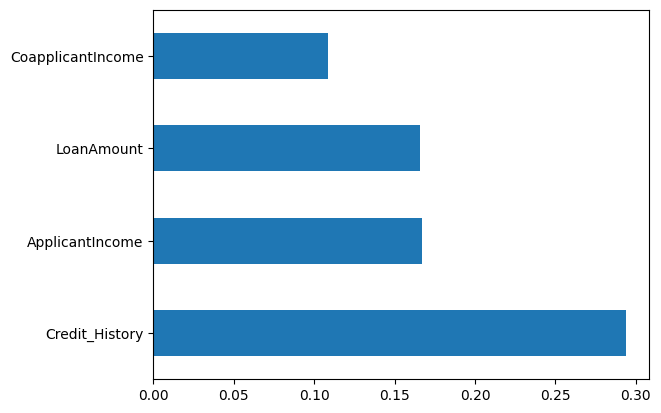

In [3]:
#Feature Selection 2

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_)

feat_importance = pd.Series(model.feature_importances_, index=X.columns)
feat_importance.nlargest(4).plot(kind='barh')
plt.show()

In [4]:
#Numerical to Categorical

from sklearn.preprocessing import LabelEncoder

# Reset the DataFrame to its original state if needed (optional)
df = pd.read_csv("train.csv")  # Reload the data if you want to start fresh
X = df.drop('Loan_ID', axis=1) # Use 'Loan_ID' (case-sensitive)
X = X.drop('Loan_Status', axis=1)
Y = df['Loan_Status']

# Now apply pd.cut
df['ApplicantIncome']=pd.cut(df['ApplicantIncome'],3,labels=['0','1','2'])
df['CoapplicantIncome']=pd.cut(df['CoapplicantIncome'],3,labels=['0','1','2'])
df['LoanAmount']=pd.cut(df['LoanAmount'],3,labels=['0','1','2'])
df['Loan_Amount_Term']=pd.cut(df['Loan_Amount_Term'],3,labels=['0','1','2'])

print(df)

X = df.drop('Loan_ID', axis=1) # Use 'Loan_ID' (case-sensitive)
X = X.drop('Loan_Status', axis=1)
Y = df['Loan_Status']
print(Y)
le=LabelEncoder()
le.fit(Y)
Y = le.transform(Y)
print(Y)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

    ApplicantIncome CoapplicantIncome LoanAmount Loan_Amount_Term  \
0                 0                 0        NaN                2 

In [5]:
#Categorical to Numerical

le=LabelEncoder()
le.fit(Y)
Y = le.transform(Y)

In [6]:
#Dealing with missing values

print(df.isnull().sum())

# Replace 'Actual_Column_Name1' and 'Actual_Column_Name2' with the actual column names from your dataset
df['ApplicantIncome'].fillna((df['ApplicantIncome'].mode()[0]), inplace=True)  #Imputing Categorical Values

# Get the existing categories for 'Loan_Amount_Term'
existing_categories = df['Loan_Amount_Term'].cat.categories

# Check if 'Medium' is in the existing categories
if 'Medium' not in existing_categories:
    # Add 'Medium' to the categories if it's not present
    df['Loan_Amount_Term'] = df['Loan_Amount_Term'].cat.add_categories(['Medium'])

df['Loan_Amount_Term'].fillna(('Medium'), inplace=True)  #Imputing Categorical Values


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
Counter({1: 422, 0: 422})
Counter({1: 422, 0: 422})


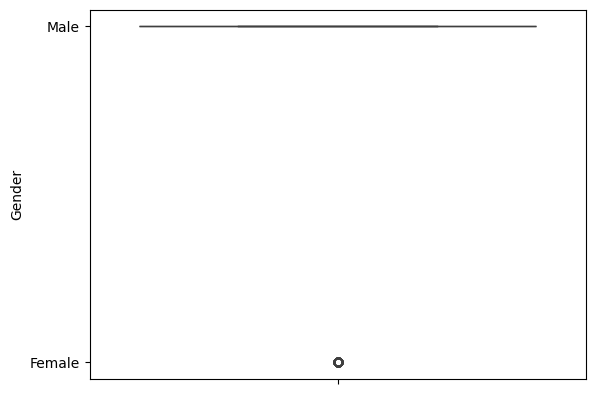

In [8]:
#Dealing with missing values

print(df.isnull().sum())

# Replace 'Actual_Column_Name1' and 'Actual_Column_Name2' with the actual column names from your dataset
df['ApplicantIncome'].fillna((df['ApplicantIncome'].mode()[0]), inplace=True)  #Imputing Categorical Values

# Get the existing categories for 'Loan_Amount_Term'
existing_categories = df['Loan_Amount_Term'].cat.categories

# Check if 'Medium' is in the existing categories
if 'Medium' not in existing_categories:
    # Add 'Medium' to the categories if it's not present
    df['Loan_Amount_Term'] = df['Loan_Amount_Term'].cat.add_categories(['Medium'])

df['Loan_Amount_Term'].fillna(('Medium'), inplace=True)  #Imputing Categorical Values

# Handle missing values in X before applying SMOTE
X.fillna(X.mode().iloc[0], inplace=True)  # Fill missing values with the mode of each column

#Oversampling and Under Sampling

#a = (df['Loan_Status'] == 'Y').sum()
#print(a)
from collections import Counter
print(Counter(Y))
from imblearn.over_sampling import RandomOverSampler     #Random OverSampling
ros=RandomOverSampler(random_state=0)
X, Y = ros.fit_resample(X,Y)
print(Counter(Y))
from imblearn.over_sampling import SMOTE                 #Synthetic Minority Oversampling (SMOTE) oversampling
sms=SMOTE(random_state=0)
X, Y=sms.fit_resample(X,Y)  # Now X should not have NaNs

from imblearn.under_sampling import RandomUnderSampler   #Random UnderSampling
rus=RandomUnderSampler(random_state=0)
X, Y=rus.fit_resample(X,Y)


#Identifying Outliers by ploting

from matplotlib import pyplot as plt
import seaborn as sns
sns.boxplot(df['Gender'])
plt.show()

In [9]:
#Dealing with Outliers using Interquantile Range
'''
print(df['ApplicantIncome'])
Q1 = df['ApplicantIncome'].quantile(0.25)
Q3 = df['ApplicantIncome'].quantile(0.75)

IQR = Q3 - Q1
print(IQR)

upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

print(upper)
print(lower)

out1=df[df['ApplicantIncome'] < lower].values
out2=df[df['ApplicantIncome'] > upper].values

df['ApplicantIncome'].replace(out1,lower,inplace=True)
df['ApplicantIncome'].replace(out2,upper,inplace=True)

print(df['ApplicantIncome'])
'''

"\nprint(df['ApplicantIncome'])\nQ1 = df['ApplicantIncome'].quantile(0.25)\nQ3 = df['ApplicantIncome'].quantile(0.75)\n\nIQR = Q3 - Q1\nprint(IQR)\n\nupper = Q3 + 1.5*IQR\nlower = Q1 - 1.5*IQR\n\nprint(upper)\nprint(lower)\n\nout1=df[df['ApplicantIncome'] < lower].values\nout2=df[df['ApplicantIncome'] > upper].values\n\ndf['ApplicantIncome'].replace(out1,lower,inplace=True)\ndf['ApplicantIncome'].replace(out2,upper,inplace=True)\n\nprint(df['ApplicantIncome'])\n"

In [10]:
#Principal Component Analysis

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd # Import pandas explicitly

logr=LogisticRegression()
pca=PCA(n_components=2)

# Check if 'Loan_Id' exists in df before dropping
if 'Loan_Id' in df.columns:
    X = df.drop('Loan_Id', axis=1)  # Drop 'Loan_Id' which is non-numerical
else:
    X = df.copy()  # Create a copy if 'Loan_Id' is already removed

# Similarly, check for 'Loan_Status'
if 'Loan_Status' in X.columns:
    X = X.drop('Loan_Status', axis=1)  # Drop target variable
Y = df['Loan_Status']

# Convert all columns in X to numerical using one-hot encoding
X = pd.get_dummies(X)  # Convert categorical to numerical

# Handle remaining NaNs after one-hot encoding
X.fillna(X.mode().iloc[0], inplace=True)  # Fill any remaining NaNs with mode

pca.fit(X)
X=pca.transform(X)

print(X)

X_train, X_test, y_train, y_test = train_test_split(X,Y,random_state=0,test_size=0.3)

logr.fit(X_train,y_train)

y_pred=logr.predict(X_test)
print(accuracy_score(y_test,y_pred))

[[ 0.77581875  0.28339992]
 [-0.72877487  0.06386271]
 [-0.28783826  0.06752451]
 ...
 [-0.85438202 -0.19223873]
 [-0.84840921 -0.02064001]
 [ 1.4869709  -0.76805537]]
0.7135135135135136


In [11]:
#Clustering

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

KM= KMeans(n_clusters=3, random_state=0)
irs=load_iris()
x=irs.data

X_train,X_test=train_test_split(x,random_state=0)

KM.fit(X_train)

y_pred=KM.predict(X_test)

center=KM.cluster_centers_

print(center)
print(y_pred)

[[4.9972973  3.38918919 1.45405405 0.24054054]
 [5.84390244 2.7097561  4.32926829 1.40731707]
 [6.90588235 3.09705882 5.70294118 2.07058824]]
[1 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1 0 2 1 0 1 2 1 0
 1]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Column 'Loan_Id' not found in the DataFrame. Please check your data.


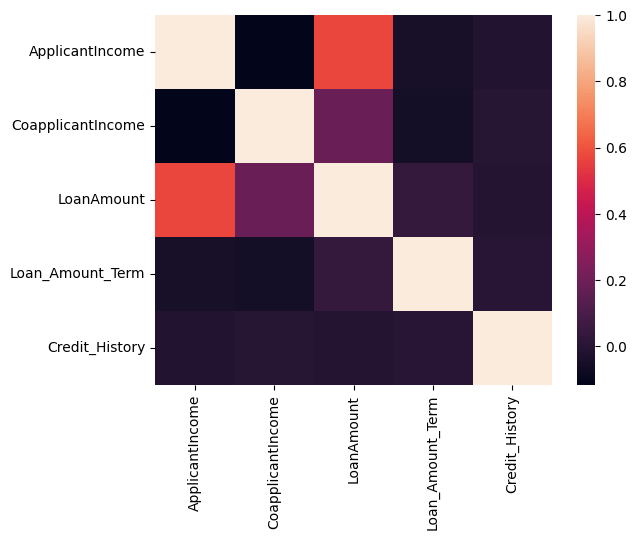

In [12]:
import pandas as pd              #pd is an Alias
from matplotlib import pyplot as plt
import seaborn as sns


df=pd.read_csv("train.csv")   # Make sure 'train.csv' contains the 'Loan_Id' column

#Preparing X and Y
# Check if 'Loan_Id' is in the DataFrame, and drop it along with 'Loan_Status'
if 'Loan_Id' in df.columns:
    X = df.drop(['Loan_Id', 'Loan_Status'], axis=1)  # Drop both columns at once
    Y = df['Loan_Status']
else:
    print("Column 'Loan_Id' not found in the DataFrame. Please check your data.")

'''
#Scatter Plot to find correlations between two continuous variables
plt.scatter(df["PetalLengthCm"], df["PetalWidthCm"])
plt.title("Scatter Plot")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.show()
'''

'''
#Histrogram shows the distribution of a continuous variable.  It can discover the frequency distribution for a single variable in a univariate analysis.
plt.hist(df["SepalWidthCm"])
plt.title("Histogram Plot")
plt.xlabel("Sepal Width")
plt.ylabel("Frequency")
plt.show()
'''

'''
#Bar Chart or Bar Plot is used to represent categorical data with vertical or horizontal bars.
sns.barplot(df["Species"], df["PetalLengthCm"])
plt.title("Bar Plot")
plt.show()
'''

'''
#Pie Chart is a type of plot which is used to represent the proportion of each category in categorical data.
mylabels = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]
sizes = [50, 50, 50]
plt.pie(sizes, labels=mylabels, explode=(0.1, 0.1, 0.1))
plt.axis('equal')
plt.show()
'''

'''
#Count Plot s similar to a bar plot except that we only pass the X-axis and Y-axis represents explicitly counting the number of occurrences. Each bar represents count for each category of species.
sns.countplot(x='Species', data = df)
plt.title("Count Plot for Species")
plt.show()
'''

'''
#Box Plot Boxplot is used to show the distribution of a variable. The box plot is a standardized way of displaying the distribution of data based on the five-number summary: minimum, first quartile, median, third quartile, and maximum.
sns.boxplot(x='SepalLengthCm', data = df) #if x horizontal and if y vertical
plt.title("Box plot showing the distribution of Sepal Length")
plt.show()
'''


#Heatmap is a type of Matrix plot that allows you to plot data as color-encoded matrices. It is mostly used to find multi-collinearity in a dataset.
# Calculate correlations on numerical columns only
numerical_df = df.select_dtypes(include=['number'])  # Select only numerical columns
sns.heatmap(numerical_df.corr())
plt.show()

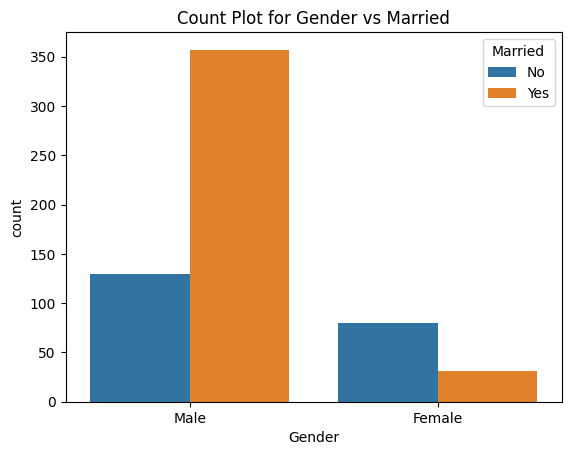

In [13]:
import pandas as pd              #pd is an Alias
from matplotlib import pyplot as plt
import seaborn as sns

# ... (rest of your code)

# For categorical variables, use a bar plot or count plot
sns.countplot(x='Gender', hue='Married', data=df)  # Countplot with hue for comparison
plt.title("Count Plot for Gender vs Married")
plt.show()

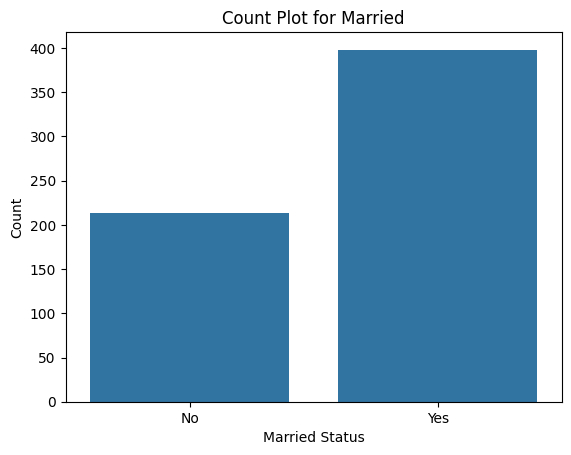

In [14]:
import pandas as pd              #pd is an Alias
from matplotlib import pyplot as plt
import seaborn as sns

# ... (rest of your code)

# For categorical variables like 'Married', use a count plot
sns.countplot(x='Married', data=df)
plt.title("Count Plot for Married")
plt.xlabel("Married Status")  # More descriptive label
plt.ylabel("Count")
plt.show()

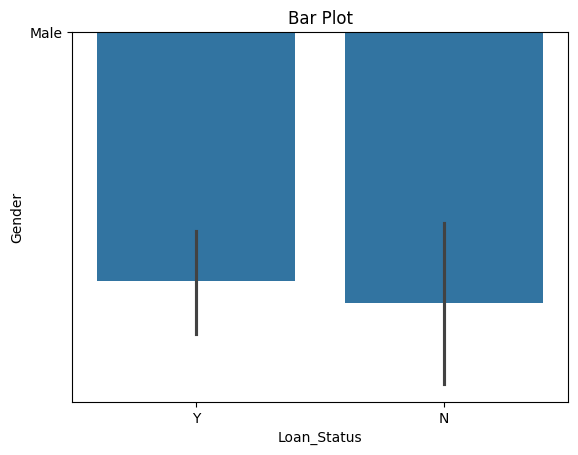

In [15]:
#Bar Chart or Bar Plot is used to represent categorical data with vertical or horizontal bars.
sns.barplot(x="Loan_Status", y="Gender", data=df)  # Use keyword arguments for x and y
plt.title("Bar Plot")
plt.show()

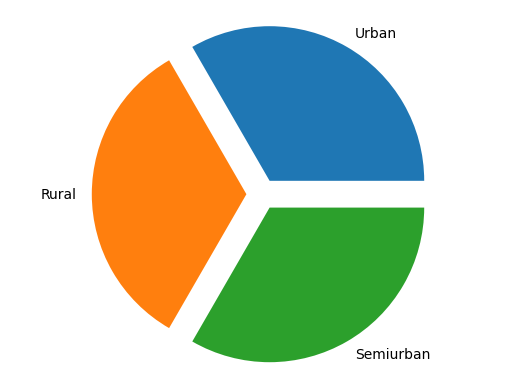

In [16]:
#Pie Chart is a type of plot which is used to represent the proportion of each category in categorical data.
mylabels = ["Urban", "Rural", "Semiurban"]
sizes = [50, 50, 50]
plt.pie(sizes, labels=mylabels, explode=(0.1, 0.1, 0.1))
plt.axis('equal')
plt.show()

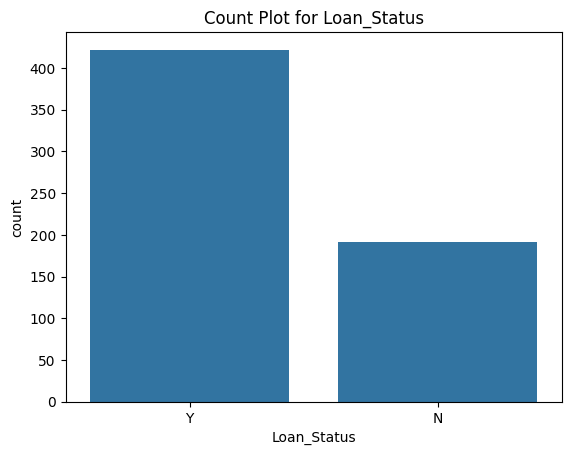

In [17]:
#Count Plot s similar to a bar plot except that we only pass the X-axis and Y-axis represents explicitly counting the number of occurrences. Each bar represents count for each category of species.
sns.countplot(x='Loan_Status', data = df)
plt.title("Count Plot for Loan_Status")
plt.show()

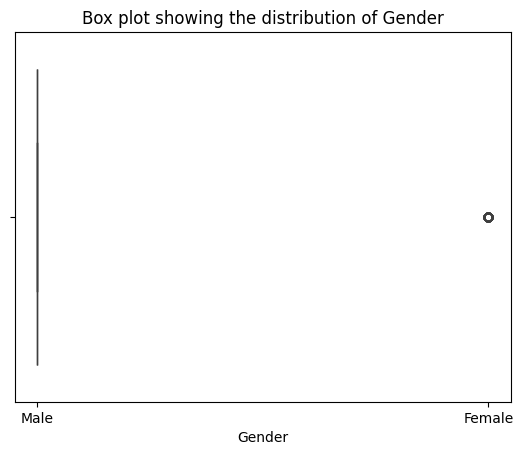

In [18]:
#Box Plot Boxplot is used to show the distribution of a variable. The box plot is a standardized way of displaying the distribution of data based on the five-number summary: minimum, first quartile, median, third quartile, and maximum.
sns.boxplot(x='Gender', data = df) #if x horizontal and if y vertical
plt.title("Box plot showing the distribution of Gender")
plt.show()